In [1]:
import numpy as np
from scipy import stats
import pickle as pk
import matplotlib.pyplot as plt
import math
from scipy import integrate
from astropy.io import fits
import seaborn as sns
import pandas as pd


In [118]:
def bootstrap(data, n = 10000):
    temp = np.zeros(n)
    data = np.array(data)
    for i in range(n):
        flags = np.random.randint(len(data), size = len(data))
        temp[i] = np.mean(data[flags])
    return temp

In [2]:
def itt_nu(vlass_flux, nvss_flux):
    freq_nvss = 1.4
    freq_vlass = [0, 3]
    nu = [-0.7]
    i = 1
    
    #while (freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i] > 0.01:
        #print((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i])
    while i < 100:
        #print((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i])
        
        const_v = np.log(freq_vlass[i]/freq_nvss)

        spectral_index = (np.log(vlass_flux/nvss_flux)/(const_v)) 
        freq_vlass_guess = anal_cent_freq(spectral_index)
        
        freq_vlass.append(freq_vlass_guess)
        nu.append(spectral_index)
        
        
        i+=1
        
        #print(abs((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i]))
        if abs((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i]) < 0.001:
            return(freq_vlass, nu)
        if i > 100:
            print('Error, did not converge')
            return(freq_vlass, nu)
    return(freq_vlass, nu)
        

In [3]:
def cent_freq(alpha):
    x1 = lambda x: x**alpha
    x2 = lambda x: x*x**alpha
    return integrate.quad(x2, 2, 4)[0]/ integrate.quad(x1,2,4)[0]

def anal_cent_freq(alpha):
    return (alpha+1)/(alpha+2)*(4**(alpha+2)-2**(alpha+2))/(4**(alpha+1)-2**(alpha+1))

In [4]:
v = -0.7

print(cent_freq(v))
print(anal_cent_freq(v))

2.9198306185674934
2.9198306185674934


In [5]:
"""'MOO J1131+3217': {'NVSS': 0.020253161867937568,
  'VLASS': 0.009777066533970924,
  'nu': -0.9555611562231429,
  '90': 0.0003790782583089198,
  '150': 0.0002326691637289474},"""


itt_nu(0.009777066533970924, 0.020253161867937568)

([0, 3, 2.890484939910748, 2.884865330176797, 2.88455545928773],
 [-0.7, -0.9555611562231429, -1.0045787561138677, -1.0072827148428183])

In [6]:
act_fluxes_dict = pk.load(open('ACT_central_flux_Dec15.pickle', 'rb'))
mdcw_fluxes_dict = pk.load(open('Madcows_central_flux_Dec15.pickle', 'rb'))



In [7]:
print(mdcw_fluxes_dict['MOO J1142+1527'])

[0.013324372438853467, 0.0004621986511990069, 5.619737814556811e-05]


In [16]:
nvss_act_fluxes = np.zeros(len(act_fluxes_dict.keys())-1)
back_sub_nvss_act_fluxes =np.zeros(len(act_fluxes_dict.keys())-1)
for i, key in enumerate(act_fluxes_dict.keys()):
    if i == 0: continue
    nvss_act_fluxes[i-1] = act_fluxes_dict[key][0]
    back_sub_nvss_act_fluxes[i-1] = (act_fluxes_dict[key][0] - act_fluxes_dict[key][1])
    
nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
back_sub_nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i == 0: continue
    nvss_mdcw_fluxes[i-1] = mdcw_fluxes_dict[key][0]
    back_sub_nvss_mdcw_fluxes[i-1] = (mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1])
    


#print(len(back_sub_nvss_act_fluxes))
cut = -99
nvss_act_fluxes = nvss_act_fluxes[nvss_act_fluxes > cut]
nvss_mdcw_fluxes = nvss_mdcw_fluxes[nvss_mdcw_fluxes > cut]
nvss_act_fluxes.sort()
nvss_mdcw_fluxes.sort()

back_sub_nvss_act_fluxes = back_sub_nvss_act_fluxes[back_sub_nvss_act_fluxes > cut]
back_sub_nvss_mdcw_fluxes = back_sub_nvss_mdcw_fluxes[back_sub_nvss_mdcw_fluxes > cut]
back_sub_nvss_act_fluxes.sort()
back_sub_nvss_mdcw_fluxes.sort()

min_act = min(back_sub_nvss_act_fluxes)
min_mdcw = min(back_sub_nvss_mdcw_fluxes)

#back_sub_nvss_act_fluxes = [1e3*value for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [1e3*value for value in back_sub_nvss_mdcw_fluxes]

#back_sub_nvss_act_fluxes = [value+min_act for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [value+min_mdcw for value in back_sub_nvss_mdcw_fluxes]
print(np.mean(nvss_mdcw_fluxes), np.mean(back_sub_nvss_mdcw_fluxes))
print(np.percentile(back_sub_nvss_mdcw_fluxes, [75,90,95]), np.percentile(back_sub_nvss_act_fluxes, [75,90,95]))

big_contamination = [cluster for cluster in back_sub_nvss_act_fluxes if cluster>0.04 ]
print(len(big_contamination)/len(back_sub_nvss_act_fluxes))

0.003518886148919963 0.003251378990142996
[0.00197229 0.00563166 0.01234586] [0.00447098 0.01176338 0.02096447]
0.019754564501646213


4.001552294619071e-05


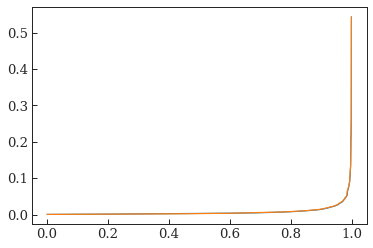

<Figure size 324.445x324.445 with 0 Axes>

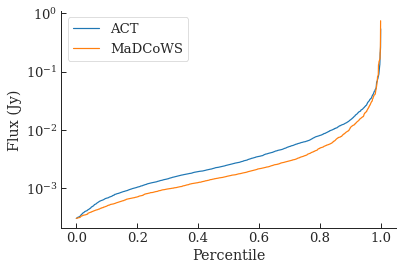

In [34]:
x0 = np.arange(len(nvss_act_fluxes))
x1 = np.arange(len(nvss_mdcw_fluxes))
x2 =  np.arange(len(back_sub_nvss_act_fluxes))
x3 =  np.arange(len(back_sub_nvss_mdcw_fluxes))



plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(nvss_act_fluxes, back_sub_nvss_act_fluxes)[1]

import matplotlib
matplotlib.rc('font',**{'family':'serif','sans-serif':['Times'],'size':11})
"""
#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_back_sub.pdf')
plt.show()
print(np.mean(nvss_act_fluxes),np.mean(back_sub_nvss_act_fluxes))


plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(nvss_mdcw_fluxes, back_sub_nvss_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_mdcw_back_sub.pdf')
print(np.mean(nvss_mdcw_fluxes),np.mean(back_sub_nvss_mdcw_fluxes))
plt.show()
plt.close()
"""
dpi = 72.27*390.00/504.00

factory = 0.50
factorx = 1.00 if fullpage else 0.50
figsize = (factorx*504.00/dpi,factory*504.00/dpi)

fig = plt.figure(figsize=figsize)


fig, ax = plt.subplots()
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'ACT', color = sns.color_palette()[0])
plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'MaDCoWS', color = sns.color_palette()[1])
#plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
#plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.yscale('symlog', linthreshy=1e-4)
p_value = stats.ks_2samp(back_sub_nvss_mdcw_fluxes, back_sub_nvss_act_fluxes)[1]

plt.legend()



plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
#plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
#plt.yscale('symlog', linthreshy=1e-4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in')
print(p_value)
plt.savefig('./plots/KStests/NVSS_act_mdcw_comp_back_sub.pdf')
plt.show()

#plt.hist(back_sub_nvss_mdcw_fluxes, bins = 50)
#plt.hist(back_sub_nvss_act_fluxes, bins = 50)
#plt.show()

# VLASS KS Test

In [32]:
vlass_mdcw_fluxes_dict = pk.load(open('./pks/smooth_vlass.p', 'rb'))
print(vlass_mdcw_fluxes_dict)

{'MOO J0538-2326': [-1.7484474e-05, 5.935368e-05, 1.9608387e-05], 'MOO J1528+1752': [-1.0814352e-05, 3.1613657e-05, 4.4697048e-05], 'MOO J2317-2342': [1.3532866e-05, 3.15816e-05, 0.00012721232], 'MOO J1550+5727': [0.001101234, 3.4232078e-05, 8.310758e-05], 'MOO J0950+0425': [2.560937e-05, 1.6319334e-05, 2.1475369e-05], 'MOO J0254+1012': [0.0020875558, 0.0058887615, 0.009079219], 'MOO J0253-0619': [-4.069822e-05, -2.4339748e-05, 0.00011888463], 'MOO J1507+3126': [0.00052098616, 4.7621208e-05, 0.00013761742], 'MOO J1257-2214': [-2.9575226e-06, 1.8947365e-05, 2.9192202e-05], 'MOO J1203-0909': [0.0001298892, 0.0001240844, 7.500845e-05], 'MOO J1535+2329': [0.00031704677, 0.006782715, 0.0013919869], 'MOO J0304-1612': [3.7050459e-06, 8.431335e-06, 5.6516972e-05], 'MOO J1219+4250': [4.6280533e-05, 0.00051699067, 0.00024518286], 'MOO J1337-2911': [7.281469e-06, 0.00046031477, 0.00042483318], 'MOO J1234+4021': [0.00013638404, 6.0764447e-05, 0.00010316677], 'MOO J0218-1416': [-0.0004577175, -0.00

In [17]:
vlass_dict_mdcw = {}

vlass_mdcw_fluxes = []
back_sub_vlass_mdcw_fluxes = []
for i, key in enumerate(vlass_mdcw_fluxes_dict.keys()):
    if i == 0: continue
    if np.isnan(vlass_mdcw_fluxes_dict[key][0]) or np.isnan(vlass_mdcw_fluxes_dict[key][1]):continue
    flux = vlass_mdcw_fluxes_dict[key][0]
    backsub_flux = vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1]
    vlass_dict_mdcw[key] = [flux, backsub_flux]
    vlass_mdcw_fluxes.append(flux)
    back_sub_vlass_mdcw_fluxes.append(backsub_flux)

vlass_mdcw_fluxes = np.array(vlass_mdcw_fluxes)    
back_sub_vlass_mdcw_fluxes= np.array(back_sub_vlass_mdcw_fluxes)

cut = -99
vlass_mdcw_fluxes = vlass_mdcw_fluxes[vlass_mdcw_fluxes > cut]
vlass_mdcw_fluxes.sort()

back_sub_vlass_mdcw_fluxes = back_sub_vlass_mdcw_fluxes[back_sub_vlass_mdcw_fluxes > cut]
back_sub_vlass_mdcw_fluxes.sort()

In [24]:
print(np.mean(back_sub_vlass_mdcw_fluxes))
print(np.mean(vlass_mdcw_fluxes))
print(vlass_mdcw_fluxes_dict)

0.0006529346370584141
0.0013041112
{'MOO J0001+142': 0.001351835538655588, 'MOO J0001+364': 0.002224073058355286, 'MOO J0001+344': 0.0003297147885352736, 'MOO J0001-244': -0.0005791305775078165, 'MOO J0001-253': 0.0019357377765123474, 'MOO J0002-082': 0.0046990286056194375, 'MOO J0002+175': -0.00220595162015802, 'MOO J0003-292': 0.00038656812357174, 'MOO J0003-134': -0.004067045245599976, 'MOO J0006-024': 0.0037598714483020323, 'MOO J0005+002': -0.005729571184000637, 'MOO J0004+010': -0.0007256243013991082, 'MOO J0005+132': -0.005747984273061044, 'MOO J0005+140': 0.003332856939297524, 'MOO J0005-044': -0.002002629574725301, 'MOO J0006+305': -0.0020352672159442142, 'MOO J0006-075': -0.005206318488754524, 'MOO J0007-210': 0.001165724700221138, 'MOO J0008-170': 0.001015826068045289, 'MOO J0009-075': -0.002186817657649498, 'MOO J0010+202': -0.004314674434109378, 'MOO J0010+314': -0.0011341070602658432, 'MOO J0010+275': -0.0015137713674933106, 'MOO J0011-141': 0.009178661776339858, 'MOO J00

8.022431620468353e-49
0.0013041119 0.0006376277880704783


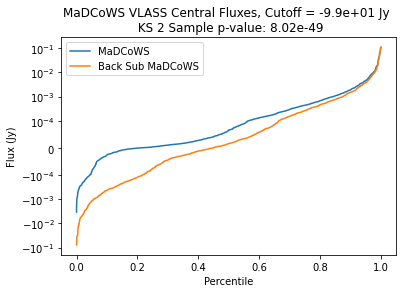

In [39]:
x1 = np.arange(len(vlass_mdcw_fluxes))
x3 =  np.arange(len(back_sub_vlass_mdcw_fluxes))

plt.plot(x1/len(x1), vlass_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_vlass_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(vlass_mdcw_fluxes, back_sub_vlass_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS VLASS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/VLASS_mdcw_back_sub.pdf')
print(np.mean(vlass_mdcw_fluxes),np.mean(back_sub_vlass_mdcw_fluxes))
plt.show()
plt.close()


# Compute spectral indecies

In [22]:
mooFile = open("madcowsCentralFlux.txt",'r')
mooLines = mooFile.readlines()
actFile = open("actCentralFlux.txt",'r')
actLines = actFile.readlines()
vlassmooNameArr = [] # moo names stored here
vlassmooFluxArr = [] # moo fluxes stored here
for line in mooLines:
    vlassmooNameArr.append(line.strip()[2:15])
    vlassmooFluxArr.append(float(line.strip()[18:len(line.strip())-2]))
vlassactNameArr = [] # act names stored here
vlassactFluxArr = [] # act fluxes stored here
for line in actLines:
    
    temp = float(line.strip()[23:len(line.strip())-2])
    if np.isnan(temp):continue
    vlassactFluxArr.append(temp)
    vlassactNameArr.append(line.strip()[2:21])

vlass_act_fluxes_dict = {}
#print(mooLines)
for i, key in enumerate(vlassactNameArr):
    vlass_act_fluxes_dict[key] = vlassactFluxArr[i]
vlass_mdcw_fluxes_dict = {}
for i, key in enumerate(vlassmooNameArr):
    vlass_mdcw_fluxes_dict[key] = vlassmooFluxArr[i]

In [23]:
nvss_act_fluxes_dict = pk.load(open('ACT_central_flux.pickle', 'rb'))
nvss_mdcw_fluxes_dict = pk.load(open('Madcows_central_flux.pickle', 'rb'))
#nvss_act_fluxes_dict.pop('Name')
#nvss_mdcw_fluxes_dict.pop('Name')


In [24]:

print(vlass_mdcw_fluxes_dict.keys())
#print(mdcw_fluxes_dict.keys())

dict_keys(['MOO J0001+142', 'MOO J0001+364', 'MOO J0001+344', 'MOO J0001-244', 'MOO J0001-253', 'MOO J0002-082', 'MOO J0002+175', 'MOO J0003-292', 'MOO J0003-134', 'MOO J0006-024', 'MOO J0005+002', 'MOO J0004+010', 'MOO J0005+132', 'MOO J0005+140', 'MOO J0005-044', 'MOO J0006+305', 'MOO J0006-075', 'MOO J0007-210', 'MOO J0008-170', 'MOO J0009-075', 'MOO J0010+202', 'MOO J0010+314', 'MOO J0010+275', 'MOO J0011-141', 'MOO J0011-253', 'MOO J0012-021', 'MOO J0012-194', 'MOO J0013+070', 'MOO J0014-090', 'MOO J0014-045', 'MOO J0015+205', 'MOO J0015+282', 'MOO J0015-135', 'MOO J0015+080', 'MOO J0015+104', 'MOO J0017+141', 'MOO J0018+085', 'MOO J0018+225', 'MOO J0018+311', 'MOO J0018-145', 'MOO J0018+120', 'MOO J0018+000', 'MOO J0019-190', 'MOO J0021+015', 'MOO J0020-124', 'MOO J0020+355', 'MOO J0020-255', 'MOO J0021-143', 'MOO J0021-064', 'MOO J0021-185', 'MOO J0022-273', 'MOO J0022-180', 'MOO J0023+091', 'MOO J0023+145', 'MOO J0025-094', 'MOO J0024+284', 'MOO J0024-034', 'MOO J0024+330', 'MO

In [17]:
radio_dict = {}
const_v = np.log(3/1.4)
vlass_mdcw_fluxes_dict = pk.load(open('./pks/smooth_vlass.p', 'rb'))

for key in mdcw_fluxes_dict.keys():
    if key == 'Name': continue

    

    if key in vlass_mdcw_fluxes_dict.keys():
        nvss_backsub_flux = mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1]
        vlass_backsub_flux = vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1]
        
        nvss_noise = mdcw_fluxes_dict[key][2]
        vlass_noise = vlass_mdcw_fluxes_dict[key][2]
        
        cut = 2.5e-3
        if nvss_backsub_flux < cut or vlass_backsub_flux < cut: continue
        
        nu_obj = itt_nu(vlass_backsub_flux, nvss_backsub_flux)
        spectral_index, cent_freq_vlass = nu_obj[1][-1], nu_obj[0][-1]
        
        spectral_noise = 1/abs(np.log(1.4/cent_freq_vlass))*np.sqrt((nvss_noise/nvss_backsub_flux)**2+(vlass_noise/vlass_backsub_flux)**2)
        
        if np.isnan(spectral_index): continue

        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data
        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index
        sigma_f_90 = np.sqrt(((90/1.4)**spectral_index*nvss_noise)**2+(nvss_noise*np.log(90/1.4)*(90/1.4)**spectral_index*spectral_noise))
        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index
        sigma_f_150 = np.sqrt(((150/1.4)**spectral_index*nvss_noise)**2+(nvss_noise*np.log(150/1.4)*(150/1.4)**spectral_index*spectral_noise))

        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'NVSS_noise':nvss_noise, 'VLASS':vlass_backsub_flux, 'VLASS_noise':vlass_noise,
                           'nu':spectral_index, 'sigma_nu':spectral_noise, '90':flux_90, '150':flux_150, 'sigma_90':sigma_f_90, 'sigma_150':sigma_f_150}
        

"""
for key in vlass_mdcw_fluxes_dict.keys():
    #print(key)
    temp_key = key
    
    if key in mdcw_fluxes_dict.keys():

        nvss_backsub_flux = mdcw_fluxes_dict[temp_key][0] - mdcw_fluxes_dict[temp_key][1]
        vlass_backsub_flux = vlass_dict_mdcw[key][0] - vlass_mdcw_fluxes_dict[key][1]
        if nvss_backsub_flux < 5e-3 or vlass_backsub_flux < 5e-3: continue
        
        spectral_index = (np.log(vlass_backsub_flux/nvss_backsub_flux)/(const_v))
        
        if np.isnan(spectral_index): continue
        #print(np.abs(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key])))
        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data
        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index
        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index
        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'VLASS':vlass_backsub_flux, 'nu':spectral_index, '90':flux_90, '150':flux_150}
        
        
"""

"\nfor key in vlass_mdcw_fluxes_dict.keys():\n    #print(key)\n    temp_key = key\n    \n    if key in mdcw_fluxes_dict.keys():\n\n        nvss_backsub_flux = mdcw_fluxes_dict[temp_key][0] - mdcw_fluxes_dict[temp_key][1]\n        vlass_backsub_flux = vlass_dict_mdcw[key][0] - vlass_mdcw_fluxes_dict[key][1]\n        if nvss_backsub_flux < 5e-3 or vlass_backsub_flux < 5e-3: continue\n        \n        spectral_index = (np.log(vlass_backsub_flux/nvss_backsub_flux)/(const_v))\n        \n        if np.isnan(spectral_index): continue\n        #print(np.abs(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key])))\n        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data\n        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index\n        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index\n        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'VLASS':vlass_backsub_flux, 'nu':spectral_index, '90':flux_90, '150':flux_150}\n

In [10]:
print(radio_dict)
pk.dump(radio_dict, open('./pks/nus.p', 'wb'))
#radio_dict = pk.load(open('./pks/nus.p', 'rb'))

{'MOO J1310+2852': {'NVSS': 0.003449417619959611, 'NVSS_noise': 2.4966429574542988e-05, 'VLASS': 0.0034190102, 'VLASS_noise': 0.00014361716, 'nu': -0.011617702744433635, 'sigma_nu': 0.055959714075378086, '90': 0.0032865454379317795, '150': 0.0032670988001002317, 'sigma_90': 0.002354267840765312, 'sigma_150': 0.002487114433133565}, 'MOO J1131+3217': {'NVSS': 0.020693006066450345, 'NVSS_noise': 0.0001581557307497478, 'VLASS': 0.009796538, 'VLASS_noise': 0.00062551576, 'nu': -1.0358602618345605, 'sigma_nu': 0.08909643501568001, '90': 0.0002772487858024184, '150': 0.00016332976943334, 'sigma_90': 0.0008865795512197804, 'sigma_150': 0.0007210179757715985}, 'MOO J0843+5933': {'NVSS': 0.008537627588017616, 'NVSS_noise': 3.3725089462996215e-05, 'VLASS': 0.005245983, 'VLASS_noise': 7.872196e-05, 'nu': -0.6604110705779282, 'sigma_nu': 0.02106588843238295, '90': 0.0005460575190370865, '150': 0.00038969696308111765, 'sigma_90': 0.0004349538542548217, 'sigma_150': 0.00038932893016843705}, 'MOO J093

In [11]:
nus = []
nvss_fluxes = []
vlass_fluxes = []
flux_90 = []
for key in radio_dict.keys():
    if radio_dict[key]['90'] >1:
        continue
    if math.isnan(radio_dict[key]['nu']): continue
    nus.append(radio_dict[key]['nu'])
    nvss_fluxes.append(radio_dict[key]['NVSS'])
    vlass_fluxes.append(radio_dict[key]['VLASS'])
    flux_90.append(radio_dict[key]['90'])
    if radio_dict[key]['90'] >1:
        print(key)
    
#cut_nu = np.array(nus)[np.array(nus)<5]
print(radio_dict['MOO J2358-2851'])

{'NVSS': 0.002537280641124371, 'NVSS_noise': 0.0001155917033023099, 'VLASS': 0.01067147, 'VLASS_noise': 0.00011640153, 'nu': 1.7455969243079392, 'sigma_nu': 0.05690392915136065, '90': 3.6358634984863896, '150': 8.86882458399568, 'sigma_90': 0.25822187045757344, 'sigma_150': 0.5203018655315339}


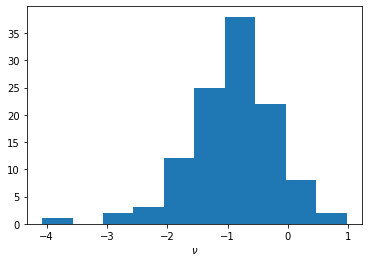

In [12]:
plt.hist(nus)
plt.xlabel(r'$\nu$')
plt.savefig('./plots/2.5radio_nus.pdf')

In [38]:
print(np.mean(nus), np.std(nus))

-0.9065849203340556 0.7401859152940282


In [39]:
print(np.mean(nvss_fluxes))
print(np.mean(vlass_fluxes))

0.027430833211685775
0.015112473


In [209]:
zipped_lists = zip(fluxes, nus)


sorted_zipped_lists = sorted(zipped_lists)
print(sorted_zipped_lists)

sorted_list1 = [element for _, element in sorted_zipped_lists]

[('-0.00010045965058290677', 9.342303801603004), ('-0.00010149660592343811', 5.227508672857886), ('-0.00011404907074314784', -0.9297979447671896), ('-0.0001151225882088625', 5.4446861381864595), ('-0.00011690936282653993', 7.060891630063547), ('-0.00012749096251602762', 2.1723800904260075), ('-0.00013255350976552722', 5.041101275997833), ('-0.0001365247765038332', 4.39619316266724), ('-0.00013857829095069053', 3.974785631478451), ('-0.0001431843065239943', 5.870708758859971), ('-0.00014783496228338683', 1.636197319182742), ('-0.00015043098723174314', 4.170991587694809), ('-0.00015465581130614985', 5.830837554548109), ('-0.00015484440721977492', 6.630081170189851), ('-0.00015768049979300702', 3.7339682436992008), ('-0.0001640878616092282', 1.2437125774361686), ('-0.00016858372779047983', 2.992933286857028), ('-0.00017459159381320733', 6.876136712508439), ('-0.00017544288716815528', 0.051837140503572667), ('-0.00018344077934550894', 3.8157737820526876), ('-0.00018538519631178024', 1.4259

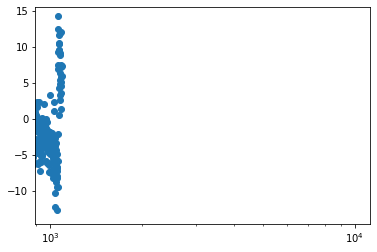

In [226]:
fluxes.sort()
rescale = [1e3*float(flux) for flux in fluxes]
plt.scatter(fluxes, sorted_list1)
plt.xscale('log')
#plt.xticks(np.arange(-1e-4,1e-2, step = 1e-3))

In [229]:
print(np.mean(nvss_mdcw_fluxes))

0.004126651915368459


In [244]:
for i, flux, in enumerate(vlassactFluxArr):
    if np.isnan(flux):
        vlassactFluxArr.pop(i)

In [19]:
print(v['MOO J0208-2951'])

KeyError: 'MOO J0208-2951'

In [41]:
#Clusters with y_0< -0.5
names = ['MOO J0306+0857', 'MOO J0208-2951', 'MOO J2247+0507', 'MOO J2038-3334', 'MOO J0936+0336', 'MOO J0354-2522', 'MOO J2052-1408', 'MOO J0043-2338', 'MOO J2347-2734']
for name in names:
    #print(name)
    
    try:
        print(name)
        print(radio_dict[name])
    except: 
        try:
            print(vlass_mdcw_fluxes_dict[name])
        except:
            print('No VLASS flux')
        print(nvss_mdcw_fluxes_dict[name])
    print('\n')

MOO J0306+0857
No VLASS flux
[0.03281623855447538, 0.0004513995702705938]


MOO J0208-2951
No VLASS flux
[0.03931925903658593, -0.00019755247822176992]


MOO J2247+0507
{'NVSS': 0.16097113961509638, 'NVSS_noise': 0.0002500934617829546, 'VLASS': 0.1018846, 'VLASS_noise': 0.0061341687, 'nu': -0.6189433017899362, 'sigma_nu': 0.08158214441012984, '90': 0.012235667771325814, '150': 0.008918994142758077, 'sigma_90': 0.0025410985886423357, 'sigma_150': 0.002298753891405642}


MOO J2038-3334
No VLASS flux
[0.007197404151314391, -0.00017308302389715423]


MOO J0936+0336
{'NVSS': 0.0262608877271471, 'NVSS_noise': 7.010736298916727e-05, 'VLASS': 0.03204433, 'VLASS_noise': 0.0018275134, 'nu': 0.25784175309803403, 'sigma_nu': 0.07397210276831157, '90': 0.07682751899720076, '150': 0.08764329145915184, 'sigma_90': 0.007950324851488345, 'sigma_150': 0.00899744625351746}


MOO J0354-2522
{'NVSS': 0.1507411647394139, 'NVSS_noise': 0.00017076689329490965, 'VLASS': 0.062505715, 'VLASS_noise': 0.0033574456

In [2]:
#High richness, low y0 clusters
names = ['MOO J0110-1521', 'MOO J0133-1057', 'MOO J0305+0453',
           'MOO J0448-1705', 'MOO J1322-0228', 'MOO J1346-0142',
           'MOO J1514+1346', 'MOO J0012+1602', 'MOO J1221+1603',
           'MOO J1426+1741']

for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        print('h')
    print(nvss_mdcw_fluxes_dict[name])

MOO J0306+0857
h


NameError: name 'nvss_mdcw_fluxes_dict' is not defined

In [8]:
names = ['MOO J1052+0823']
for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        continue
    print(nvss_mdcw_fluxes_dict[name])

MOO J1052+0823


In [92]:
print('{:.2f}'.format(np.sqrt(x**2+y**2+z**2)))

3.47


In [95]:
#print(back_sub_nvss_mdcw_fluxes[2573])
nums = np.where((back_sub_nvss_mdcw_fluxes >1e-2))[0]
print(nums)
keys = []
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i-1 in nums:
        print(key)
        keys.append(key)
        print((mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1]))

[  48  134  197  418  688  706  853 1588 1664 1806 1911 2573 2651 2668
 2680]
MOO J1922+7918
0.018707761403196084
MOO J1533+6516
0.011050086350457506
MOO J1426+0925
0.036907413066557884
MOO J2247+0507
0.02159376917263856
MOO J0318+2139
0.02005494564323441
MOO J1251+2823
0.011431284389121207
MOO J1034+3104
0.019365208568623903
MOO J1245+7613
0.017534387783171863
MOO J1116+2659
0.0222345317533526
MOO J1422-0910
0.020466561667721275
MOO J2218-1820
0.011782628682907914
MOO J1404+6550
0.0911767144427054
MOO J1124+0455
0.010769117842479706
MOO J0354-2522
0.02019328936597362
MOO J2056-1954
0.015633602058907112


In [98]:
for key in vlass_dict_mdcw.keys():
    if key[:-5] in keys:
        print(key[:-5])
        print(vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1])
        print((mdcw_fluxes_dict[key[:-5]][0] - mdcw_fluxes_dict[key[:-5]][1]))

MOO J1533+6516
0.034670352695172824
0.011050086350457506
MOO J1422-0910
0.10761154950481
0.020466561667721275
MOO J0318+2139
0.06283476492228601
0.02005494564323441
MOO J1251+2823
0.06670596744178248
0.011431284389121207
MOO J1245+7613
0.06291448007203826
0.017534387783171863
MOO J0354-2522
0.053127419833558065
0.02019328936597362
MOO J2247+0507
0.08412190346632542
0.02159376917263856
MOO J2218-1820
0.01902228060875899
0.011782628682907914
MOO J1426+0925
0.10372629031706992
0.036907413066557884


In [32]:
act=fits.open('/home/r/rbond/jorlo/dev/madcowsclusters/MADCOWSUnion_M500.fits')


In [34]:
flags = np.where((act[1].data['fixed_y_c']<-0.5))[0]
act[1].data['name'][flags]
names = []
for name in act[1].data['name'][flags]:
    names.append(name)

In [41]:
print('VLASS')
for name in names:
    try: 
        print('{}: {}'.format(name,vlass_mdcw_fluxes_dict[name][0] - vlass_mdcw_fluxes_dict[name][1]))
    except:
        print('{} not in VLASS'.format(name))
        
print('NVSS')
for name in names:
    try: 
        print('{}: {}'.format(name,mdcw_fluxes_dict[name][0] - mdcw_fluxes_dict[name][1]))
    except:
        print('{} not in NVSS'.format(name))
        
    

VLASS
MOO J0043-2338: 0.001002361299470067
MOO J0208-2951 not in VLASS
MOO J0306+0857 not in VLASS
MOO J0354-2522: 0.06250571459531784
MOO J0936+0336: 0.03204432874917984
MOO J2052-1408 not in VLASS
MOO J2247+0507: 0.10188460350036621
MOO J2347-2734: 2.5179640942951664e-05
MOO J2038-3334 not in VLASS
NVSS
MOO J0043-2338: 0.004054677042159142
MOO J0208-2951: 0.028765510541090288
MOO J0306+0857: 0.023863934119544263
MOO J0354-2522: 0.1507411647394139
MOO J0936+0336: 0.0262608877271471
MOO J2052-1408: 0.0015227125626697184
MOO J2247+0507: 0.16097113961509638
MOO J2347-2734: 0.00012084858165260521
MOO J2038-3334: 0.007145134205649873


In [51]:
for name in names:
    try:
        print('{}: {} at 90, {} at 150, alpha = {}'.format(name,radio_dict[name]['90'], radio_dict[name]['150'],radio_dict[name]['nu']))
        
    except:
        continue

MOO J0354-2522: 0.0008899118649743914 at 90, 0.00047410149504225734 at 150, alpha = -1.2327122545774516
MOO J0936+0336: 0.07682751899720076 at 90, 0.08764329145915184 at 150, alpha = 0.25784175309803403
MOO J2247+0507: 0.012235667771325814 at 90, 0.008918994142758077 at 150, alpha = -0.6189433017899362


/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


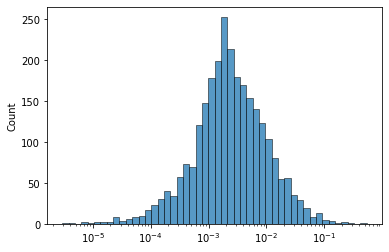

In [12]:
sns.histplot(back_sub_nvss_act_fluxes,linewidth=.5, log_scale=True)

In [14]:
cut = [0,0.5]

cut_act = back_sub_nvss_act_fluxes[back_sub_nvss_act_fluxes<cut[1]]
cut_mdcw = back_sub_nvss_mdcw_fluxes[back_sub_nvss_mdcw_fluxes<cut[1]]

cut_act = cut_act[cut_act>cut[0]]
cut_mdcw = cut_mdcw[cut_mdcw>cut[0]]

data = list(cut_act) + list(cut_mdcw)
labels = ['ACT']*len(cut_act)+['MaDCoWS']*len(cut_mdcw)

fordf = [labels, data]

df = pd.DataFrame (fordf).transpose()
df.columns = ['Source','Flux (Jy)']


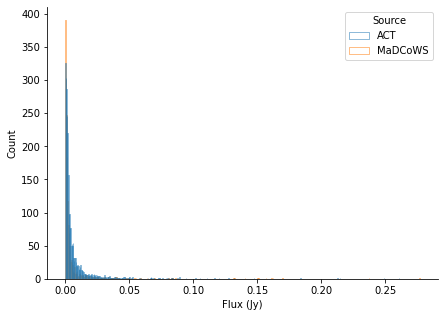

In [11]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=df, x="Flux (Jy)", hue="Source", fill=False, cumulative=False,#stat="density", 
    common_norm=False, linewidth = 0.5
)

#ax.set_xscale('log')
#ax.set_yscale('log')
plt.savefig('./plots/fig6/cumulative.pdf')

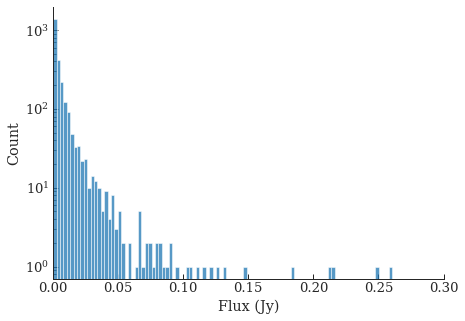

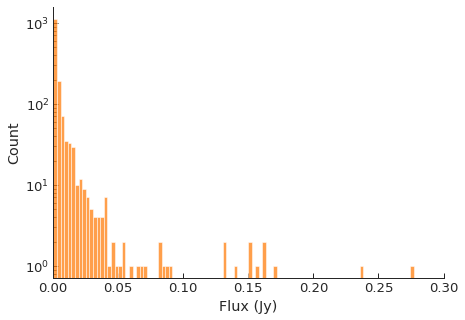

In [18]:
import matplotlib
matplotlib.rc('font',**{'family':'serif','sans-serif':['Times'],'size':11})

f, ax = plt.subplots(figsize=(7, 5))
sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in"})

sns.despine(f)


sns.histplot(cut_act
             ,linewidth=.5, bins =  100)
ax.set_yscale('log')
ax.set_xlabel('Flux (Jy)')
ax.set_xlim(0,0.3)
plt.savefig('./plots/fig6/act_radio_hist.pdf')
plt.show()
plt.close()

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(cut_mdcw
             ,linewidth=.5, bins =  100, color = sns.color_palette()[1]
)
ax.set_yscale('log')
ax.set_xlabel('Flux (Jy)')
ax.set_xlim(0,0.3)

plt.savefig('./plots/fig6/mdcw_radio_hist.pdf')

#ax.set_title('MaDCoWS Cluster Radio Fluxes')

In [74]:
print(np.median(cut_act), np.median(cut_mdcw))
print(np.mean(cut_act), np.mean(cut_mdcw))

0.0005938627681293764 0.0015904593563765142
0.003251378990142996 0.0051570417718679795


In [116]:
sns.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

No handles with labels found to put in legend.


4.001552294619071e-05


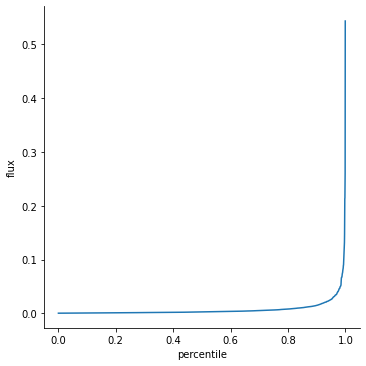

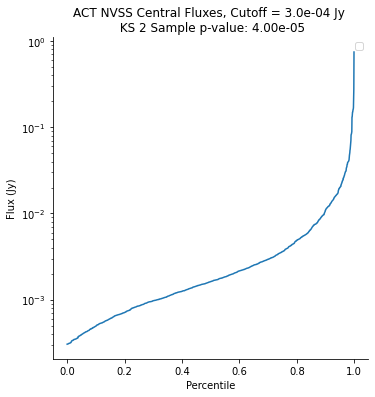

In [86]:
df_act = pd.DataFrame(dict(percentile=x2/len(x2),
                       flux=back_sub_nvss_act_fluxes))

df_mdcw = pd.DataFrame(dict(percentile=x3/len(x3),
                       flux=back_sub_nvss_mdcw_fluxes))



sns.relplot(x="percentile", y="flux", kind="line", data=df_act)
sns.relplot(x="percentile", y="flux", kind="line", data=df_mdcw)


#sns.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')

#plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
#plt.yscale('symlog', linthreshy=1e-4)
p_value = stats.ks_2samp(back_sub_nvss_mdcw_fluxes, back_sub_nvss_act_fluxes)[1]

plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('log')

print(p_value)
#plt.savefig('./plots/KStests/NVSS_act_mdcw_comp_back_sub.pdf')
plt.show()

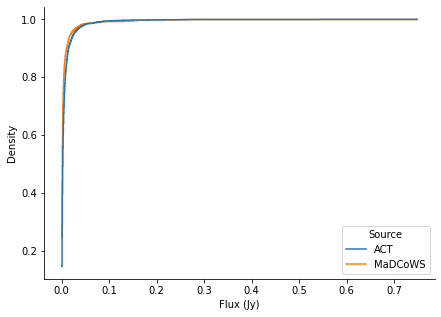

In [77]:
data = list(back_sub_nvss_act_fluxes) + list(back_sub_nvss_mdcw_fluxes)
labels = ['ACT']*len(back_sub_nvss_act_fluxes)+['MaDCoWS']*len(back_sub_nvss_mdcw_fluxes)

fordf = [labels, data]

df = pd.DataFrame (fordf).transpose()
df.columns = ['Source','Flux (Jy)']

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)


sns.histplot(
    data=df, x='Flux (Jy)', hue="Source",
    element="step", fill=False, cumulative = True,
    stat="density", common_norm=False
    
)
#ax.set_yscale('log')

# Z and Richness dependance

In [172]:
mdcw_catalog = fits.open('/home/s/sievers/sdicker/ACTnCOWs/MADCOWSUnion.fits')
vlass_mdcw_fluxes_dict = pk.load(open('./pks/smooth_vlass.p', 'rb'))

act_fluxes_dict = pk.load(open('ACT_central_flux_Dec15.pickle', 'rb'))
mdcw_fluxes_dict = pk.load(open('Madcows_central_flux_Dec15.pickle', 'rb'))


names = mdcw_catalog[1].data['name']
rich = mdcw_catalog[1].data['Rich']
z = mdcw_catalog[1].data['Photz']

nvss_back_sub_mdcw = {}

for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i == 0: continue
    nvss_back_sub_mdcw[key] = {}
    flag = np.where((names == key))[0][0]
    nvss_back_sub_mdcw[key]['flux'] = mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1]
    nvss_back_sub_mdcw[key]['rich'] = rich[flag]
    nvss_back_sub_mdcw[key]['z'] = z[flag]
    
vlass_back_sub_mdcw = {}

for i, key in enumerate(vlass_mdcw_fluxes_dict.keys()):
    vlass_back_sub_mdcw[key] = {}
    flag = np.where((names == key))[0]
    if len(flag) == 0: continue
    vlass_back_sub_mdcw[key]['flux'] = vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1]
    vlass_back_sub_mdcw[key]['rich'] = rich[flag][0]
    vlass_back_sub_mdcw[key]['z'] = z[flag][0]

In [173]:
riches = np.arange(0, 80, 10)
riches[-1] = 100

mdcw_nvss_rich_fluxes =[[],[]]
for i in range(len(riches_fluxes)-1):
    temp_riches = []
    for j, key in enumerate(nvss_back_sub_mdcw.keys()):
        if riches[i] < nvss_back_sub_mdcw[key]['rich'] <= riches[i+1]:
            temp_riches.append(nvss_back_sub_mdcw[key]['flux'])
    mdcw_nvss_rich_fluxes[0].append(np.mean(temp_riches))
    mdcw_nvss_rich_fluxes[1].append(np.std(bootstrap(temp_riches)))
    
mdcw_vlass_rich_fluxes =[[],[]]
for i in range(len(riches_fluxes)-1):
    temp_riches = []
    for j, key in enumerate(vlass_back_sub_mdcw.keys()):
        try:
            if riches[i] < vlass_back_sub_mdcw[key]['rich'] <= riches[i+1]:
                temp_riches.append(vlass_back_sub_mdcw[key]['flux'])
        except: continue
    mdcw_vlass_rich_fluxes[0].append(np.mean(temp_riches))
    mdcw_vlass_rich_fluxes[1].append(np.std(bootstrap(temp_riches)))

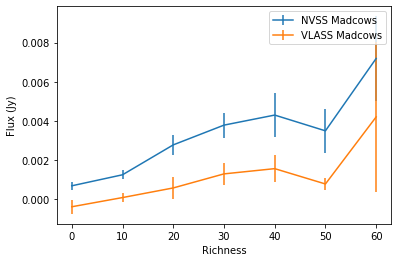

In [174]:
plt.errorbar(riches[:-1], mdcw_nvss_rich_fluxes[0], yerr = mdcw_nvss_rich_fluxes[1], label = 'NVSS Madcows')
plt.errorbar(riches[:-1], mdcw_vlass_rich_fluxes[0], yerr = mdcw_vlass_rich_fluxes[1], label = 'VLASS Madcows')
plt.xlabel('Richness')
plt.ylabel('Flux (Jy)')
plt.legend()
plt.savefig('./plots/mdcw_flux_richness.pdf')

In [175]:
zs = np.arange(0.7, 1.6, .1)

mdcw_nvss_z_fluxes =[[],[]]
for i in range(len(zs)-1):
    temp_riches = []
    for j, key in enumerate(nvss_back_sub_mdcw.keys()):
        if zs[i] < nvss_back_sub_mdcw[key]['z'] <= zs[i+1]:
            temp_riches.append(nvss_back_sub_mdcw[key]['flux'])
    mdcw_nvss_z_fluxes[0].append(np.mean(temp_riches))
    mdcw_nvss_z_fluxes[1].append(np.std(bootstrap(temp_riches)))
    
mdcw_vlass_z_fluxes =[[],[]]
for i in range(len(zs)-1):
    temp_riches = []
    for j, key in enumerate(vlass_back_sub_mdcw.keys()):
        try:
            if zs[i] < vlass_back_sub_mdcw[key]['z'] <= zs[i+1]:
                temp_riches.append(vlass_back_sub_mdcw[key]['flux'])
        except: continue
    mdcw_vlass_z_fluxes[0].append(np.mean(temp_riches))
    mdcw_vlass_z_fluxes[1].append(np.std(bootstrap(temp_riches)))

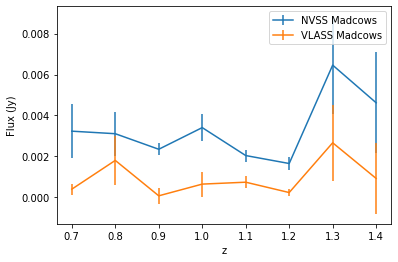

In [176]:
plt.errorbar(zs[:-1], mdcw_nvss_z_fluxes[0], yerr = mdcw_nvss_z_fluxes[1], label = 'NVSS Madcows')
plt.errorbar(zs[:-1], mdcw_vlass_z_fluxes[0], yerr = mdcw_vlass_z_fluxes[1], label = 'VLASS Madcows')
plt.xlabel('z')
plt.ylabel('Flux (Jy)')
plt.legend()
plt.savefig('./plots/mdcw_flux_z.pdf')

In [183]:
act_fluxes_dict = pk.load(open('ACT_central_flux_Dec15.pickle', 'rb'))
vlass_act_fluxes_dict = pk.load(open('./pks/smooth_vlass_act.p', 'rb'))

act_catalog = fits.open('/gpfs/fs0/project/r/rbond/jorlo/cluster_catalogs/DR5_cluster-catalog_v1.0b2.fits')

ra = act_catalog[1].data['RADeg']
names = act_catalog[1].data['name']
dec = act_catalog[1].data['decDeg']
ra, dec = np.array(ra), np.array(dec)
snr = act_catalog[1].data['fixed_SNR']
z = act_catalog[1].data['redshift']
masses = act_catalog[1].data['M500Cal']

nvss_back_sub_act = {}

for i, key in enumerate(act_fluxes_dict.keys()):
    if i == 0: continue
    nvss_back_sub_act[key] = {}
    flag = np.where((names == key))[0]
    nvss_back_sub_act[key]['flux'] = act_fluxes_dict[key][0] - act_fluxes_dict[key][1]
    nvss_back_sub_act[key]['snr'] = snr[flag]
    nvss_back_sub_act[key]['z'] = z[flag]
    nvss_back_sub_act[key]['mass'] = masses[flag]

vlass_back_sub_act = {}

for i, key in enumerate(vlass_act_fluxes_dict.keys()):
    vlass_back_sub_act[key] = {}
    flag = np.where((names == key))[0]
    if len(flag) == 0: continue
    flag = np.where((names == key))[0]
    vlass_back_sub_act[key]['flux'] = vlass_act_fluxes_dict[key][0] - vlass_act_fluxes_dict[key][1]
    vlass_back_sub_act[key]['snr'] = snr[flag]
    vlass_back_sub_act[key]['z'] = z[flag]
    vlass_back_sub_act[key]['mass'] = masses[flag]
    


In [202]:
zs = np.arange(0, 2, .25)


act_nvss_z_fluxes =[[],[]]
for i in range(len(zs)-1):
    temp_riches = []
    for j, key in enumerate(nvss_back_sub_act.keys()):
        if zs[i] < nvss_back_sub_act[key]['z'] <= zs[i+1]:
            temp_riches.append(nvss_back_sub_act[key]['flux'])
    act_nvss_z_fluxes[0].append(np.mean(temp_riches))
    act_nvss_z_fluxes[1].append(np.std(bootstrap(temp_riches)))
    
act_vlass_z_fluxes =[[],[]]
for i in range(len(zs)-1):
    temp_riches = []
    for j, key in enumerate(vlass_back_sub_act.keys()):
        if zs[i] < vlass_back_sub_act[key]['z'] <= zs[i+1]:
            temp_riches.append(vlass_back_sub_act[key]['flux'])
    act_vlass_z_fluxes[0].append(np.mean(temp_riches))
    act_vlass_z_fluxes[1].append(np.std(bootstrap(temp_riches)))
    
#############################################################################################################################
    
snrs = np.arange(4, 20, 2)

act_nvss_snr_fluxes =[[],[]]
for i in range(len(snrs)-1):
    temp_riches = []
    for j, key in enumerate(nvss_back_sub_act.keys()):
        if snrs[i] < nvss_back_sub_act[key]['snr'] <= snrs[i+1]:
            temp_riches.append(nvss_back_sub_act[key]['flux'])
    act_nvss_snr_fluxes[0].append(np.mean(temp_riches))
    act_nvss_snr_fluxes[1].append(np.std(bootstrap(temp_riches)))
    
act_vlass_snr_fluxes =[[],[]]
for i in range(len(snrs)-1):
    temp_riches = []
    for j, key in enumerate(vlass_back_sub_act.keys()):
        if snrs[i] < vlass_back_sub_act[key]['snr'] <= snrs[i+1]:
            temp_riches.append(vlass_back_sub_act[key]['flux'])
    act_vlass_snr_fluxes[0].append(np.mean(temp_riches))
    act_vlass_snr_fluxes[1].append(np.std(bootstrap(temp_riches)))
    
#############################################################################################################################    
mass_min, mass_max = min(masses), max(masses)
mass_range = np.linspace(mass_min, mass_max, 10)

act_nvss_mass_fluxes =[[],[]]
for i in range(len(mass_range)-1):
    temp_riches = []
    for j, key in enumerate(nvss_back_sub_act.keys()):
        if mass_range[i] < nvss_back_sub_act[key]['mass'] <=mass_range[i+1]:
            temp_riches.append(nvss_back_sub_act[key]['flux'])
    act_nvss_mass_fluxes[0].append(np.mean(temp_riches))
    act_nvss_mass_fluxes[1].append(np.std(bootstrap(temp_riches)))
    
act_vlass_mass_fluxes =[[],[]]
for i in range(len(mass_range)-1):
    temp_riches = []
    for j, key in enumerate(vlass_back_sub_act.keys()):
        print(vlass_back_sub_act[key]['mass'])
        if mass_range[i] < vlass_back_sub_act[key]['mass'] <=mass_range[i+1]:
            temp_riches.append(vlass_back_sub_act[key]['flux'])
    act_vlass_mass_fluxes[0].append(np.mean(temp_riches))
    act_vlass_mass_fluxes[1].append(np.std(bootstrap(temp_riches)))

/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:52: DeprecationWarning: The truth value 

[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69164721]
[2.72863889]
[3.08017454]
[4.36099339]
[3.9

[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69164721]
[2.72863889]
[3.08017454]
[4.36099339]
[3.9

[2.61460574]
[3.48899012]
[3.19685503]
[3.62864468]
[2.56998426]
[3.09932127]
[3.3385803]
[3.39654657]
[5.52271567]
[6.86036313]
[2.23628125]
[2.58417965]
[3.06325456]
[3.14446109]
[2.57529837]
[3.92765093]
[2.69317452]
[6.23421747]
[2.48814713]
[3.3271063]
[7.20903705]
[3.17929409]
[2.90307834]
[4.06522304]
[3.28612544]
[3.05693355]
[3.72740523]
[3.2367226]
[2.16209094]
[2.71178213]
[5.41726209]
[4.41537878]
[2.93928226]
[3.99859723]
[4.00962521]
[3.51793733]
[3.11429541]
[2.8359054]
[2.66366754]
[6.68779571]
[2.40229055]
[3.59630946]
[6.11517811]
[5.31748215]
[2.94535999]
[5.4098072]
[2.39238655]
[5.07425171]
[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73

[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69164721]
[2.72863889]
[3.08017454]
[4.36099339]
[3.9

[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69164721]
[2.72863889]
[3.08017454]
[4.36099339]
[3.9

[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69164721]
[2.72863889]
[3.08017454]
[4.36099339]
[3.9

[2.94535999]
[5.4098072]
[2.39238655]
[5.07425171]
[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69

[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69164721]
[2.72863889]
[3.08017454]
[4.36099339]
[3.9

[3.79734816]
[2.45242892]
[4.44588542]
[6.07740028]
[2.97184238]
[2.95755318]
[4.37001088]
[3.55935747]
[3.63114402]
[3.3179555]
[5.70436216]
[2.96775273]
[2.70432371]
[3.18586811]
[3.42236954]
[2.74182211]
[5.81540449]
[3.65120076]
[4.77263636]
[2.90908121]
[4.13865434]
[4.13865434]
[2.26105382]
[2.89708786]
[3.79734816]
[3.83413002]
[3.17491895]
[2.39898467]
[2.53309125]
[7.73353949]
[5.06726885]
[4.48277173]
[3.0822961]
[2.89908331]
[4.28066874]
[2.81063435]
[3.0172023]
[5.46220766]
[3.0590391]
[4.03732842]
[3.30200212]
[2.7211341]
[5.13753206]
[2.88713118]
[4.45201199]
[4.08486387]
[4.29838983]
[2.40063704]
[3.28838886]
[2.86140366]
[3.24564936]
[3.73511261]
[2.63448384]
[4.30135047]
[8.48102444]
[2.63993132]
[3.7999637]
[3.22337847]
[3.97389503]
[2.76837993]
[10.01185431]
[4.70412353]
[2.09468432]
[3.49861263]
[3.36164714]
[2.66550221]
[3.48899012]
[2.86337453]
[3.08654361]
[2.90108014]
[7.66462513]
[2.54708286]
[4.52619273]
[3.69164721]
[2.72863889]
[3.08017454]
[4.36099339]
[3.9

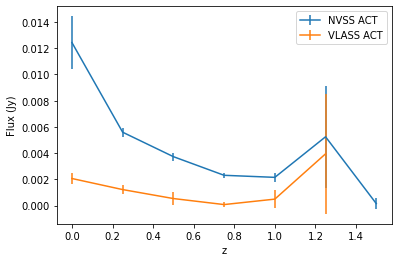

In [204]:
plt.errorbar(zs[:-1], act_nvss_z_fluxes[0], yerr = act_nvss_z_fluxes[1], label = 'NVSS ACT')
plt.errorbar(zs[:-1], act_vlass_z_fluxes[0], yerr = act_vlass_z_fluxes[1], label = 'VLASS ACT')

plt.xlabel('z')
plt.ylabel('Flux (Jy)')
plt.legend()
plt.savefig('./plots/act_flux_z.pdf')

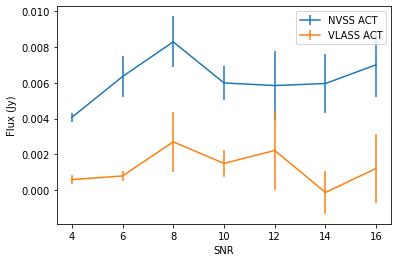

In [205]:
plt.errorbar(snrs[:-1], act_nvss_snr_fluxes[0], yerr = act_nvss_snr_fluxes[1], label = 'NVSS ACT')
plt.errorbar(snrs[:-1], act_vlass_snr_fluxes[0], yerr = act_vlass_snr_fluxes[1], label = 'VLASS ACT')

plt.xlabel('SNR')
plt.ylabel('Flux (Jy)')
plt.legend()
plt.savefig('./plots/act_flux_snr.pdf')

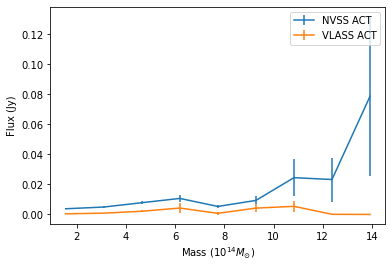

In [206]:
plt.errorbar(mass_range[:-1], act_nvss_mass_fluxes[0], yerr = act_nvss_mass_fluxes[1], label = 'NVSS ACT')
plt.errorbar(mass_range[:-1], act_vlass_mass_fluxes[0], yerr = act_vlass_mass_fluxes[1], label = 'VLASS ACT')

plt.xlabel(r'Mass ($10^{14}M_{\odot}$)')
plt.ylabel('Flux (Jy)')
plt.legend()
plt.savefig('./plots/act_flux_mass.pdf')

In [200]:
masses = []
for key in vlass_back_sub_act.keys():
    masses.append(vlass_back_sub_act[key]['mass'])

In [201]:
max(masses)

array([15.47039562])